In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [2]:
A = pd.read_csv('task1-1A.csv')
A['支付时间'] = pd.to_datetime(A['支付时间'], errors = 'coerce', format = '%Y/%m/%d %H:%M')
A['Year'] = A.支付时间.dt.year
A['Month'] = A.支付时间.dt.month
A['Day'] = A.支付时间.dt.day
A['Hrs'] = A.支付时间.dt.hour
A['Min'] = A.支付时间.dt.minute
A.sample(10)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,大类,二级类,Year,Month,Day,Hrs,Min
13287,DD20170816749335756896940871,E43A6E078A04134,3.5,3.5,500ml康师傅冰糖雪梨,2017-06-26 18:33:00,B,已出货未退款,已提现,饮料,果蔬饮料,2017,6,26,18,33
11306,DD201708167493802775257316704,E43A6E078A04134,3.0,3.0,250ml维他奶巧克力味,2017-10-21 19:53:00,B,已出货未退款,已提现,饮料,植物蛋白,2017,10,21,19,53
12068,DD2017061714375928F6C78D89FE8,E43A6E078A04134,3.0,3.0,雪碧（500ml）,2017-09-27 17:09:00,B,已出货未退款,已提现,饮料,碳酸饮料,2017,9,27,17,9
4846,DD201708167493392767337250057,E43A6E078A04134,2.0,2.0,145ml旺仔牛奶盒装,2017-11-11 16:55:00,B,已出货未退款,已提现,饮料,乳制品,2017,11,11,16,55
2504,DD201708167493752025043766752,E43A6E078A04134,3.5,3.5,东鹏特饮,2017-11-14 09:01:00,B,已出货未退款,已提现,饮料,功能饮料,2017,11,14,9,1
5011,DD2017081308085717EC29094240D,E43A6E078A04134,3.5,3.5,雪碧最新款,2017-12-02 17:02:00,B,已出货未退款,已提现,饮料,碳酸饮料,2017,12,2,17,2
10578,DD20170601133924146BE63D6AC70,E43A6E078A04134,25.0,25.0,芙蓉王,2017-12-31 10:34:00,B,已出货未退款,已提现,非饮料,香烟,2017,12,31,10,34
5697,DD20170818084938697FEE747AA6B,E43A6E078A04134,3.0,3.0,怡宝纯净水,2017-01-09 21:27:00,B,已出货未退款,已提现,饮料,水,2017,1,9,21,27
7085,DD201708167493520094142371581,E43A6E078A04134,4.0,4.0,250ml燕塘原味酸奶,2017-10-17 08:27:00,B,已出货未退款,已提现,饮料,乳制品,2017,10,17,8,27
12633,DD201708167493583763342173477,E43A6E078A04134,7.0,7.0,145g果王迷你山楂包装,2017-10-23 12:15:00,B,已出货未退款,已提现,非饮料,蜜饯/果干,2017,10,23,12,15


In [37]:
path = '3.2Adata.csv'
A.to_csv(path, index = False)

### 饮料分布图

In [3]:
filter_data = A[A.大类 == '饮料' ]
beverage_counts = filter_data['二级类'].value_counts()

In [4]:
font_path = '/System/Library/Fonts/PingFang.ttc'
font_prop = FontProperties(fname=font_path)

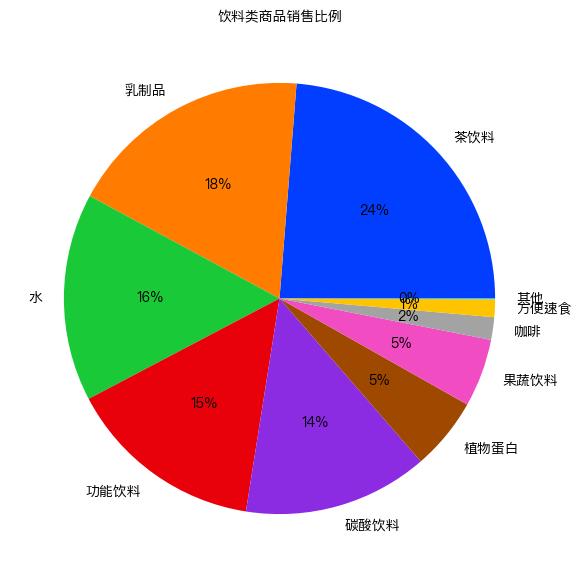

In [5]:
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(10, 7))
plt.pie(beverage_counts, labels=beverage_counts.index, colors=colors, autopct='%.0f%%', textprops={'fontproperties': font_prop})
plt.title('饮料类商品销售比例', fontproperties=font_prop)
plt.show()

### 时间分布情况 by Month and Day

In [6]:
plot_data =filter_data.groupby(['Month','Day','二级类']).订单号.count().reset_index()
plot_data.columns = ['Month', 'Day', '二级类', '订单数量']
plot_data['Date'] = pd.to_datetime(plot_data[['Month', 'Day']].assign(year=2017))
plot_data

,Month,Day,二级类,订单数量,Date
0,1,1,乳制品,1,2017-01-01
1,1,1,碳酸饮料,2,2017-01-01
2,1,1,茶饮料,1,2017-01-01
3,1,2,乳制品,4,2017-01-02
4,1,2,茶饮料,2,2017-01-02
...,...,...,...,...,...
1878,12,31,果蔬饮料,1,2017-12-31
1879,12,31,植物蛋白,2,2017-12-31
1880,12,31,水,4,2017-12-31
1881,12,31,碳酸饮料,1,2017-12-31


/Users/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aaron/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aaron/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.draw()
/Users/aaron/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 21333 

<Figure size 1200x800 with 0 Axes>

/Users/aaron/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aaron/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aaron/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


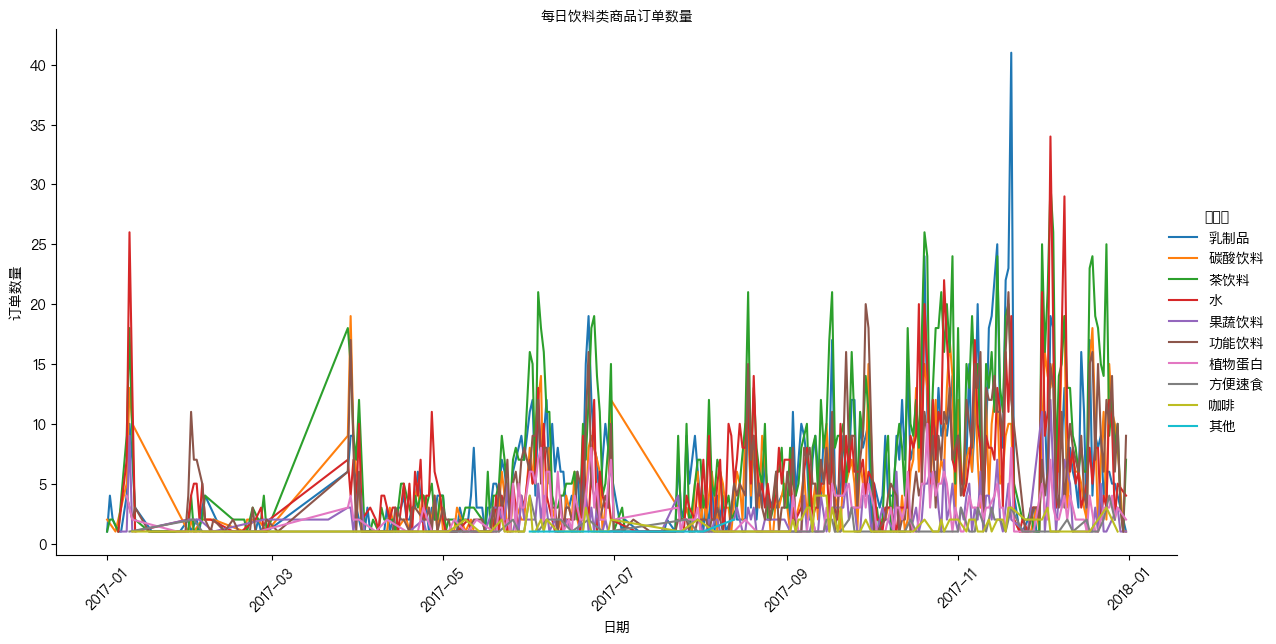

In [9]:
font_path = '/System/Library/Fonts/PingFang.ttc'  # Mac系统路径，其他系统请更换为相应的中文字体路径
font_prop = FontProperties(fname=font_path)

# 绘制关系图
plt.figure(figsize=(12, 8))
g = sns.relplot(data=plot_data, x='Date', y='订单数量', hue='二级类', kind='line', height=6, aspect=2)

# 设置字体属性
for text in g.legend.texts:
    text.set_fontproperties(font_prop)

plt.title('每日饮料类商品订单数量', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('订单数量', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

In [30]:
num = filter_data.groupby(['商品']).agg({'订单号': 'count', '二级类': 'first'}).reset_index()
num = num.rename(columns={'订单号': '订单数量'})
num_sorted = num.sort_values(by='订单数量', ascending=False)

In [31]:
num_sorted.describe()

,订单数量
count,115.000000
mean,78.539130
std,157.267472
min,1.000000
25%,5.000000
50%,17.000000
75%,94.500000
max,1342.000000


In [33]:
def label_beverage_sales(row):
    if row['订单数量'] >= 94.5:
        return '畅销'
    elif row['订单数量'] >= 17:
        return '正常'
    else:
        return '滞销'
num_sorted['标签'] = num_sorted.apply(label_beverage_sales, axis=1)

In [35]:
num_sorted.head(10)

,商品,订单数量,二级类,标签
72,怡宝纯净水,1342,水,畅销
43,东鹏特饮,488,功能饮料,畅销
107,阿萨姆奶茶,457,茶饮料,畅销
99,脉动,431,功能饮料,畅销
105,营养快线,425,乳制品,畅销
89,统一冰红茶,334,茶饮料,畅销
81,王老吉（500ml）,310,茶饮料,畅销
76,果粒橙,245,果蔬饮料,畅销
19,250ml维他柠檬茶,236,茶饮料,畅销
15,250ml维他原味豆奶,229,植物蛋白,畅销


In [36]:
path = '3-1A.csv'
num_sorted.to_csv(path, index = False)